In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as geopd

## Create data frame from dataset

In [3]:
# Read dataset and create a dataframe. 
df = pd.read_csv("datasets/UsArrests.csv")

# Rename "city" column to "state" and view data.
df = df.rename(columns={"City":"State"})
df.head()


,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Check that the data types are as expected

In [4]:
# Check which data is stored as integer.
df.applymap(pd.api.types.is_integer).head()

,State,Murder,Assault,UrbanPop,Rape
0,False,False,True,True,False
1,False,False,True,True,False
2,False,False,True,True,False
3,False,False,True,True,False
4,False,False,True,True,False


As expected, Assault and UrbanPop are stored as integer.

In [5]:
# Check which data is stored as float.
df.applymap(pd.api.types.is_float).head()

,State,Murder,Assault,UrbanPop,Rape
0,False,True,False,False,True
1,False,True,False,False,True
2,False,True,False,False,True
3,False,True,False,False,True
4,False,True,False,False,True


As expected, Murder and Rape columns are stored as float.

## Check for missing data

In [6]:
# Check for missing data
df.isnull().values.any()

False

## Plot bar chart of offences and urban population by state

<BarContainer object of 50 artists>

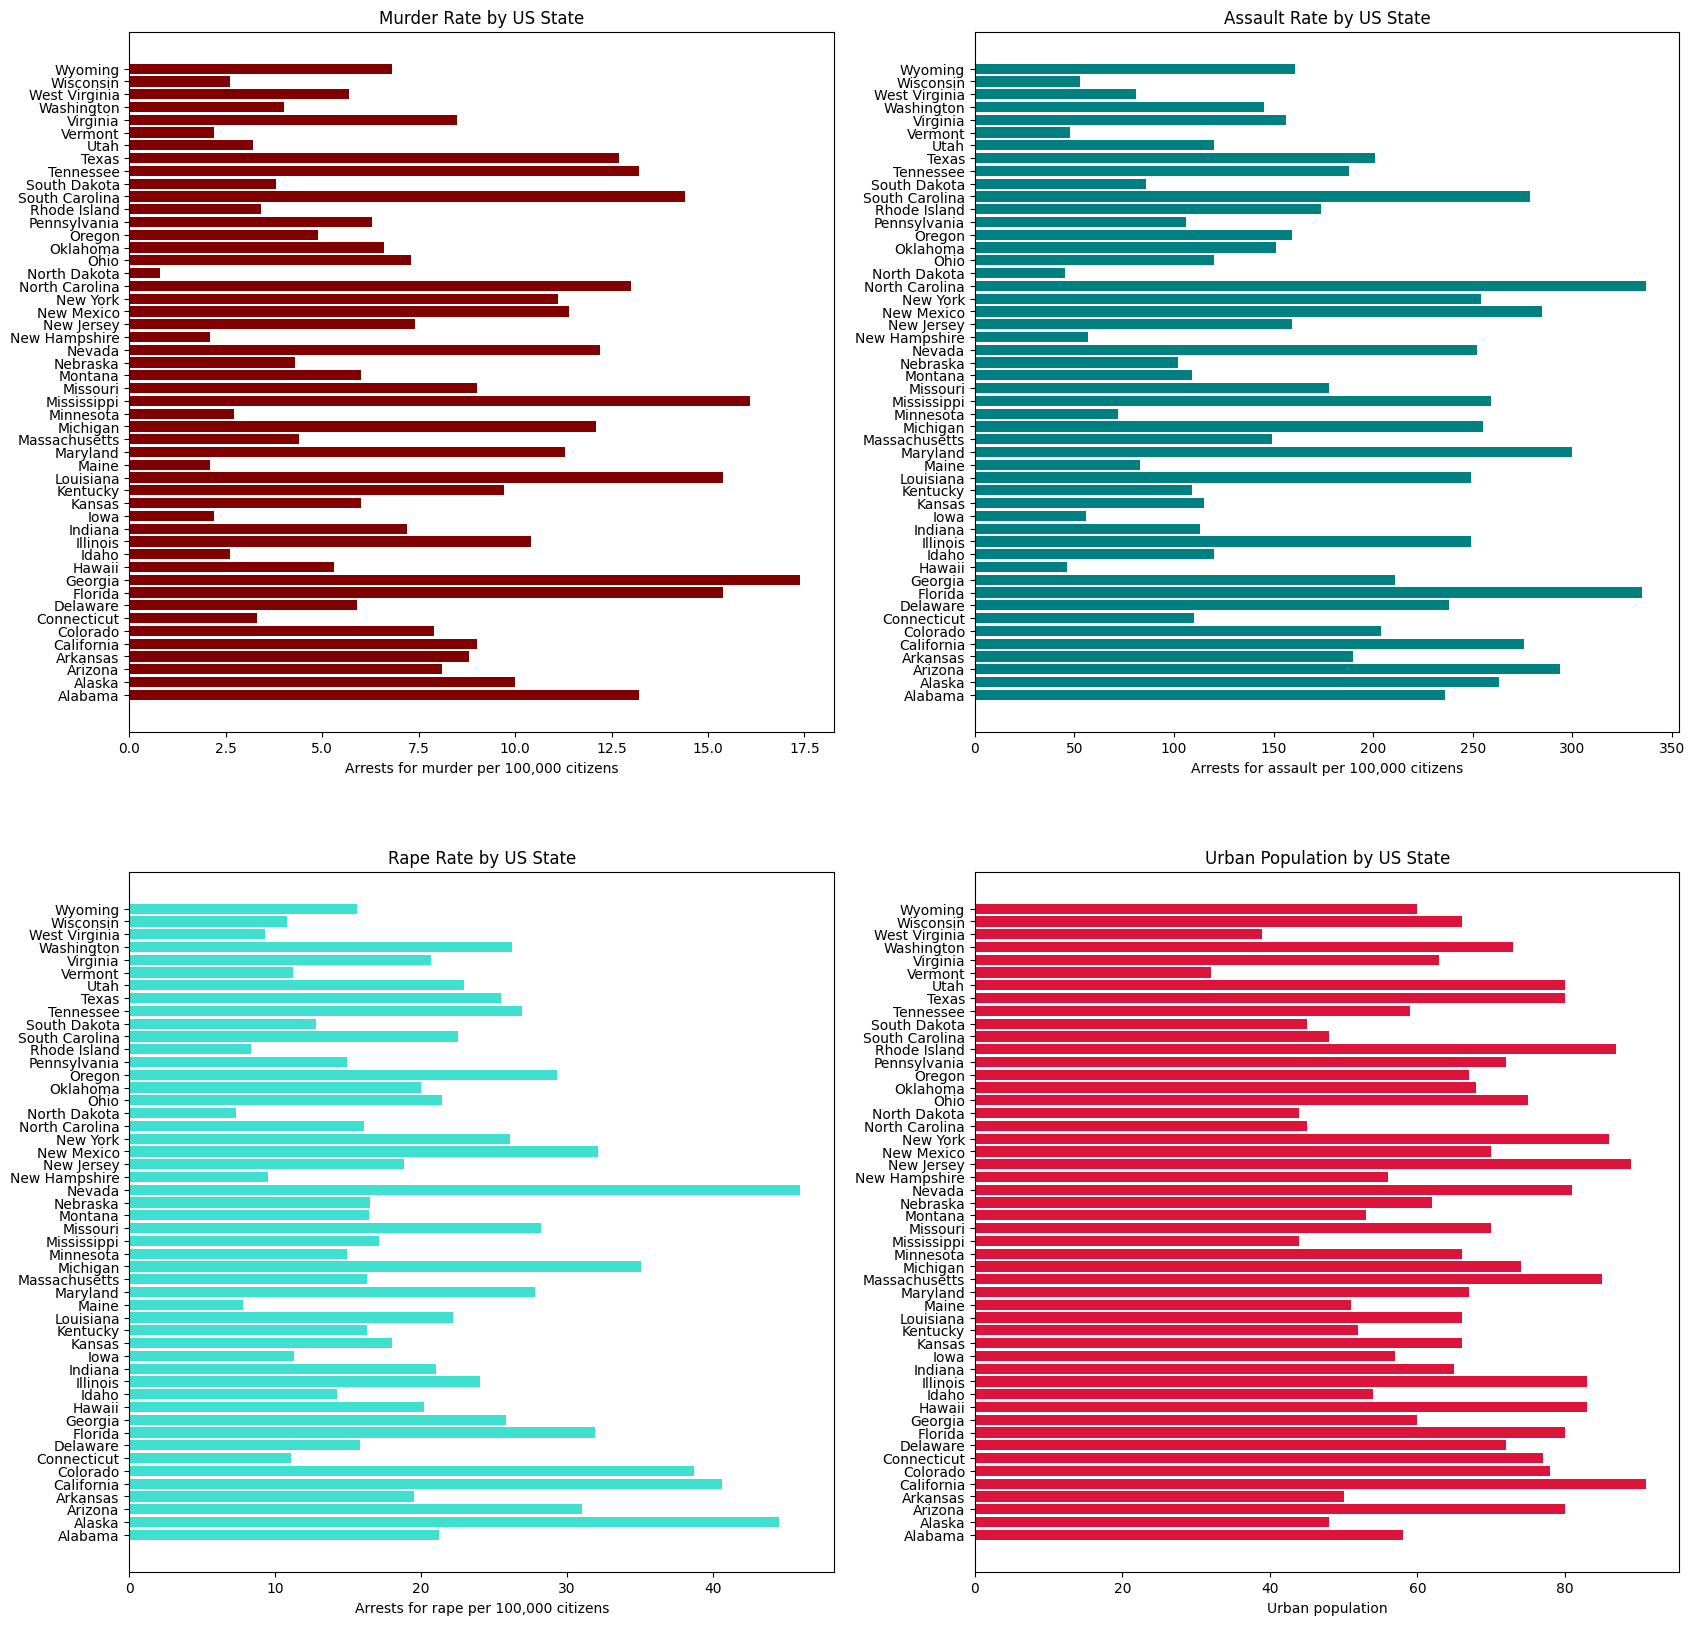

In [14]:
# Plot bar charts of violent offences and urban population by state.

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
fig.set_size_inches(20,20)
ax1.set_title("Murder Rate by US State")
ax1.set_xlabel("Arrests for murder per 100,000 citizens")
ax1.barh(y = df['State'], width = df['Murder'], color = 'maroon')

ax2.set_title("Assault Rate by US State")
ax2.set_xlabel("Arrests for assault per 100,000 citizens")
ax2.barh(y = df['State'], width = df['Assault'], color = 'teal')

ax3.set_title("Rape Rate by US State")
ax3.set_xlabel("Arrests for rape per 100,000 citizens")
ax3.barh(y = df['State'], width = df['Rape'], color = 'turquoise')

ax4.set_title("Urban Population by US State")
ax4.set_xlabel("Urban population")
ax4.barh(y = df['State'], width = df['UrbanPop'], color = 'crimson')



## Examine by geographic region

In [39]:
# Define function to convert states to geographic region.
def region_convert(state):
    west = ['Washington', 'Montana', 'Wyoming', 'Idaho', 'Colorado', 'Utah', 'Nevada', 'California', 'Oregon', 'Arizona', 'Alaska', 'New Mexico', 'Hawaii']
    midwest = ['Missouri','North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', ' Missouri', 'Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin']
    northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
    south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
    if state in west:
        return "west"
    elif state in midwest:
        return "midwest"
    elif state in northeast:
        return "northeast"
    elif state in south:
        return "south"

# Add new df column for region. 
df['Region'] = df['State'].apply(region_convert)


Text(0, 0.5, 'Murder Rate')

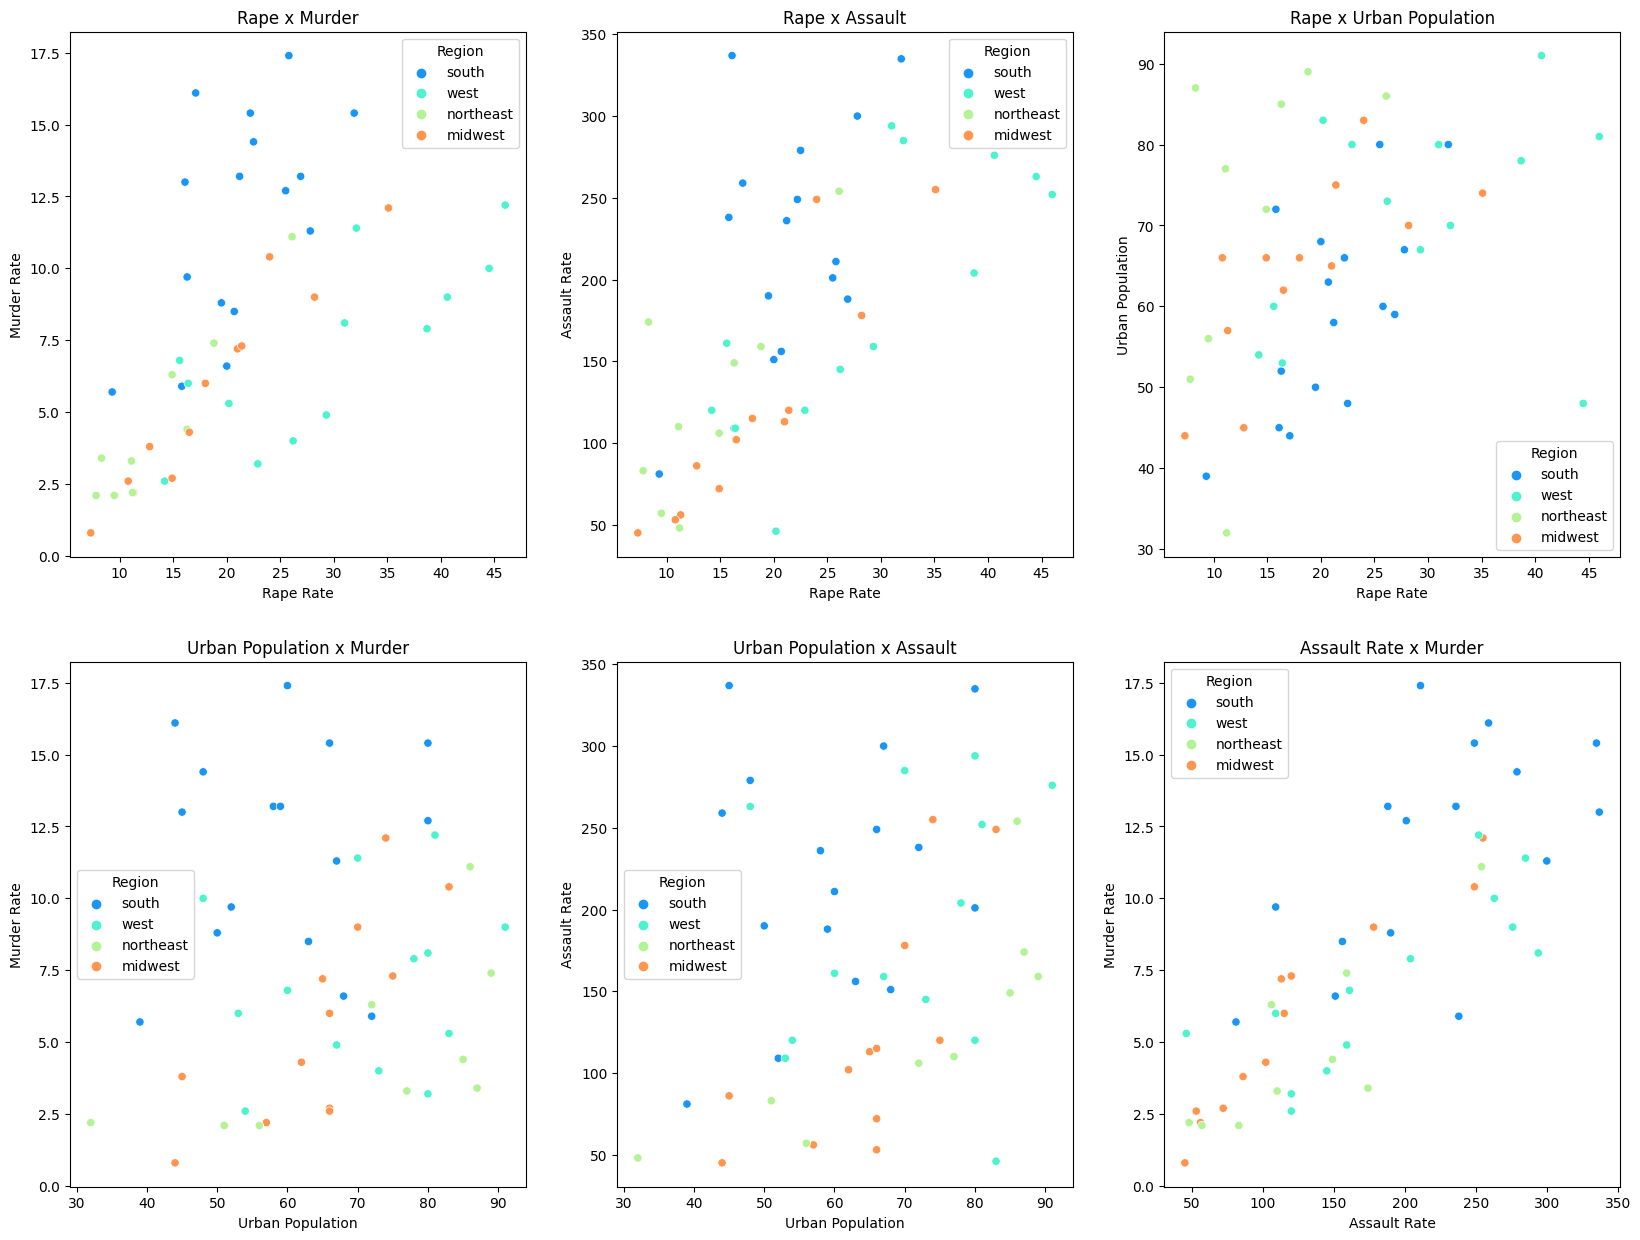

In [48]:
# Plot scatter graphs for each combination of variables, coloured by region. 
plt.figure(figsize=[20,15])
plt.subplot(2,3,1)
ax = sns.scatterplot(x = df['Rape'], y= df['Murder'], palette='rainbow', hue=df['Region'])
plt.title('Rape x Murder')
plt.xlabel('Rape Rate')
plt.ylabel('Murder Rate')

plt.subplot(2,3,2)
ax = sns.scatterplot(x=df['Rape'], y=df['Assault'], palette='rainbow', hue=df['Region'])
plt.title('Rape x Assault')
plt.xlabel('Rape Rate')
plt.ylabel('Assault Rate')


plt.subplot(2,3,3)
ax = sns.scatterplot(x=df['Rape'], y=df['UrbanPop'], palette='rainbow', hue=df['Region'])
plt.title('Rape x Urban Population')
plt.xlabel('Rape Rate')
plt.ylabel('Urban Population')

plt.subplot(2,3,4)
ax = sns.scatterplot(x=df['UrbanPop'], y=df['Murder'], palette='rainbow', hue=df['Region'])
plt.title('Urban Population x Murder')
plt.xlabel('Urban Population')
plt.ylabel('Murder Rate')

plt.subplot(2,3,5)
ax = sns.scatterplot(x=df['UrbanPop'], y=df['Assault'], palette='rainbow', hue=df['Region'])
plt.title('Urban Population x Assault')
plt.xlabel('Urban Population')
plt.ylabel('Assault Rate')

plt.subplot(2,3,6)
ax = sns.scatterplot(x=df['Assault'], y=df['Murder'] , palette='rainbow', hue=df['Region'])
plt.title('Assault Rate x Murder')
plt.xlabel('Assault Rate')
plt.ylabel('Murder Rate')

<AxesSubplot: title={'center': 'Urban Population by US Region'}, xlabel='Region', ylabel='UrbanPop'>

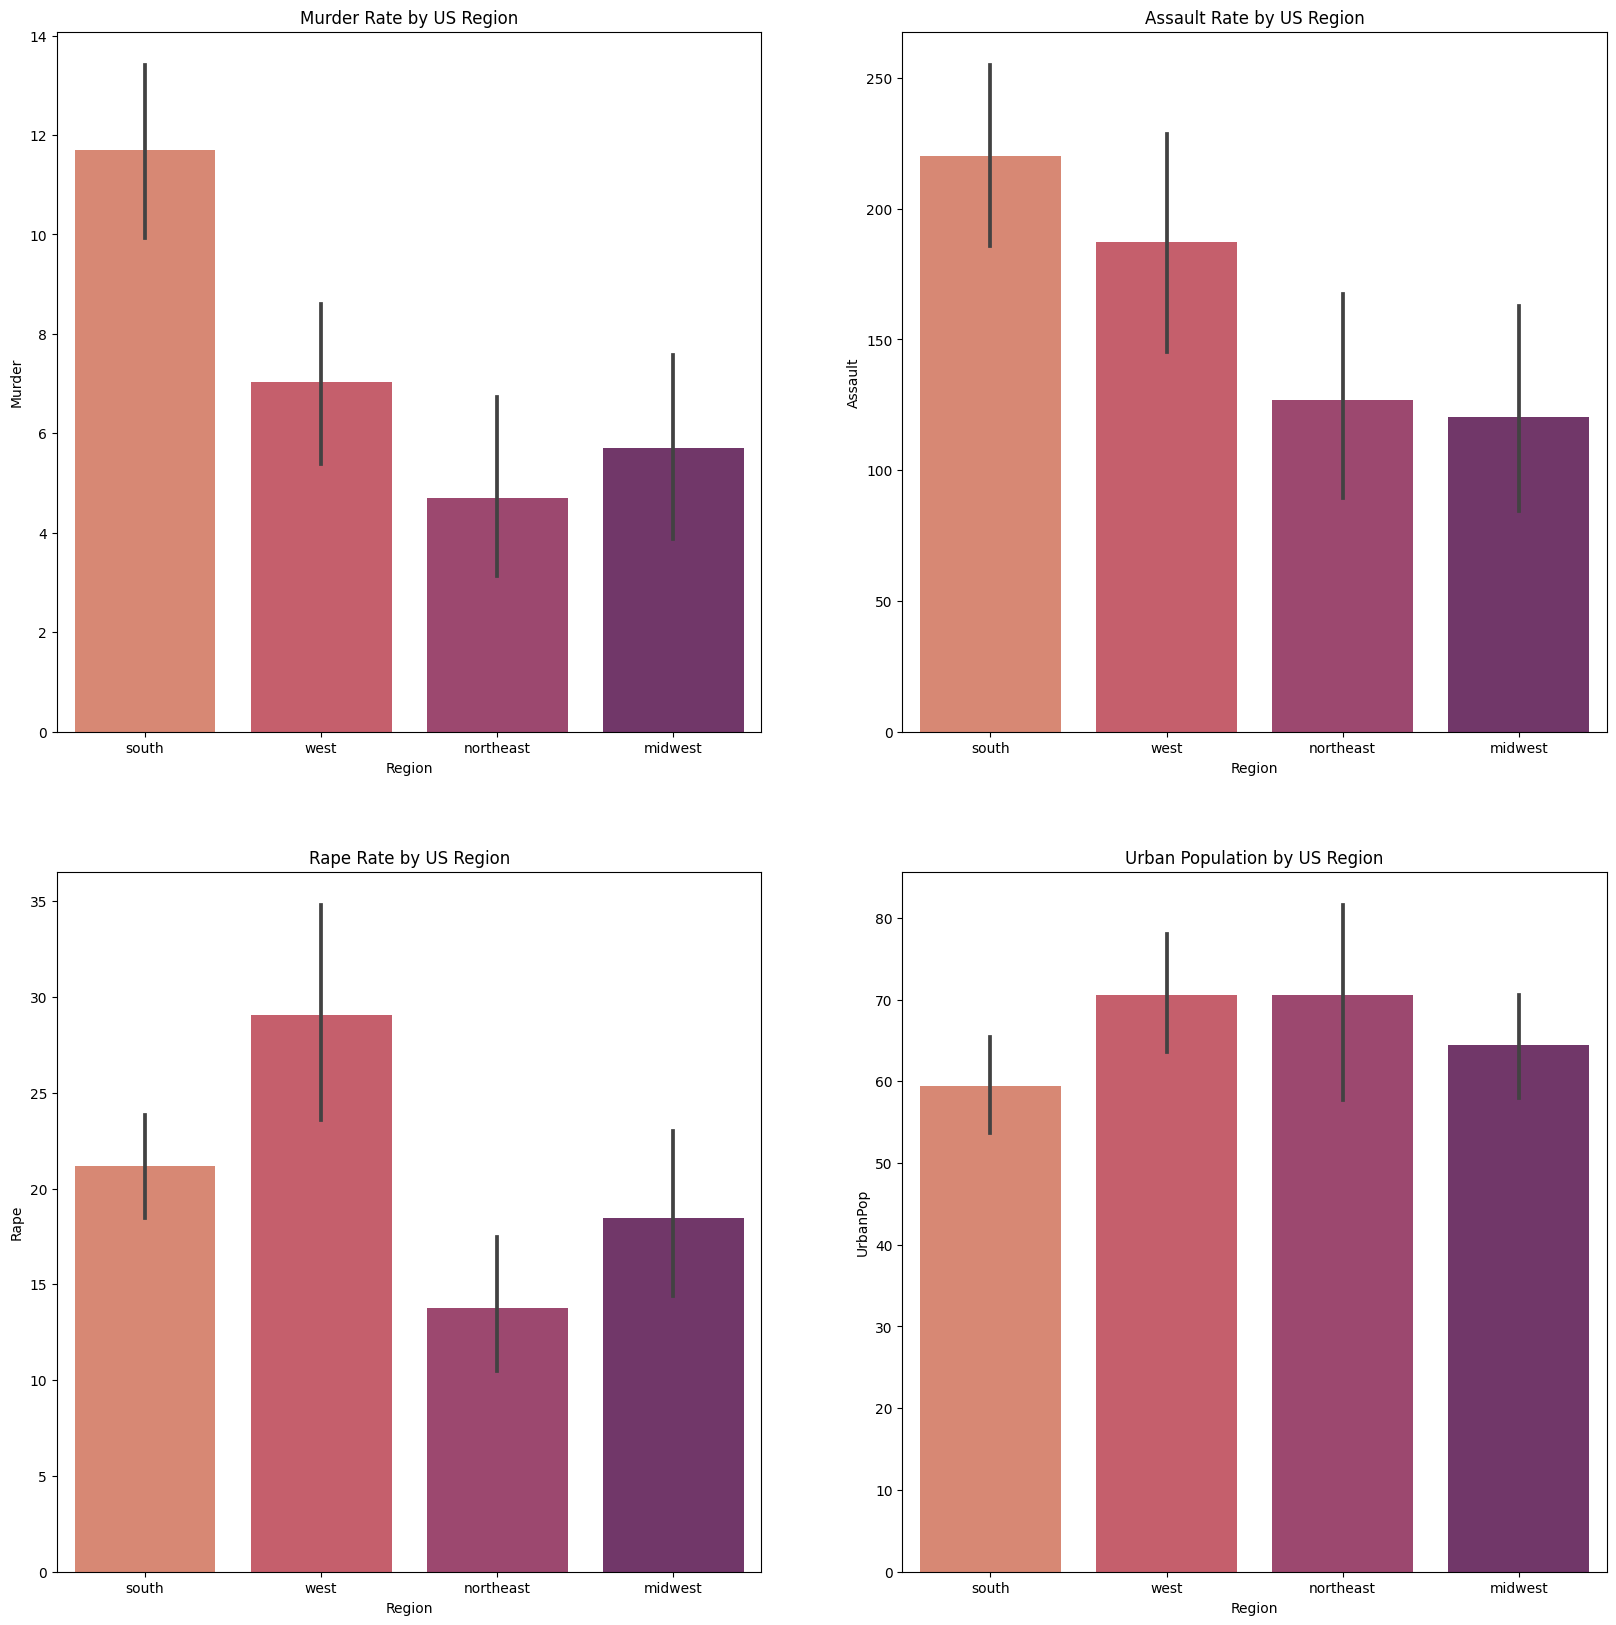

In [133]:
# Plot bar charts of violent offences and urban population by state.

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
fig.set_size_inches(20,20)

ax1.set_title("Murder Rate by US Region")
ax1.set_xlabel("Region")
ax1.set_ylabel("Arrests for murder per 100,000 citizens")
sns.barplot(df, x = "Region", y = "Murder", palette = "flare", ax=ax1)

ax2.set_title("Assault Rate by US Region")
ax2.set_xlabel("Region")
ax2.set_ylabel("Arrests for assault per 100,000 citizens")
sns.barplot(df, x = "Region", y = "Assault", palette = "flare", ax=ax2)

ax3.set_title("Rape Rate by US Region")
ax3.set_xlabel("Region")
ax3.set_ylabel("Arrests for rape per 100,000 citizens")
sns.barplot(df, x = "Region", y = "Rape", palette = "flare", ax=ax3)

ax4.set_title("Urban Population by US Region")
ax4.set_xlabel("Region")
ax4.set_ylabel('Urban Population')
sns.barplot(df, x = "Region", y = "UrbanPop", palette = "flare", ax=ax4)


## Create geographic heat maps

Text(0.5, 1.0, 'Rape Rates per 100,000 by State')

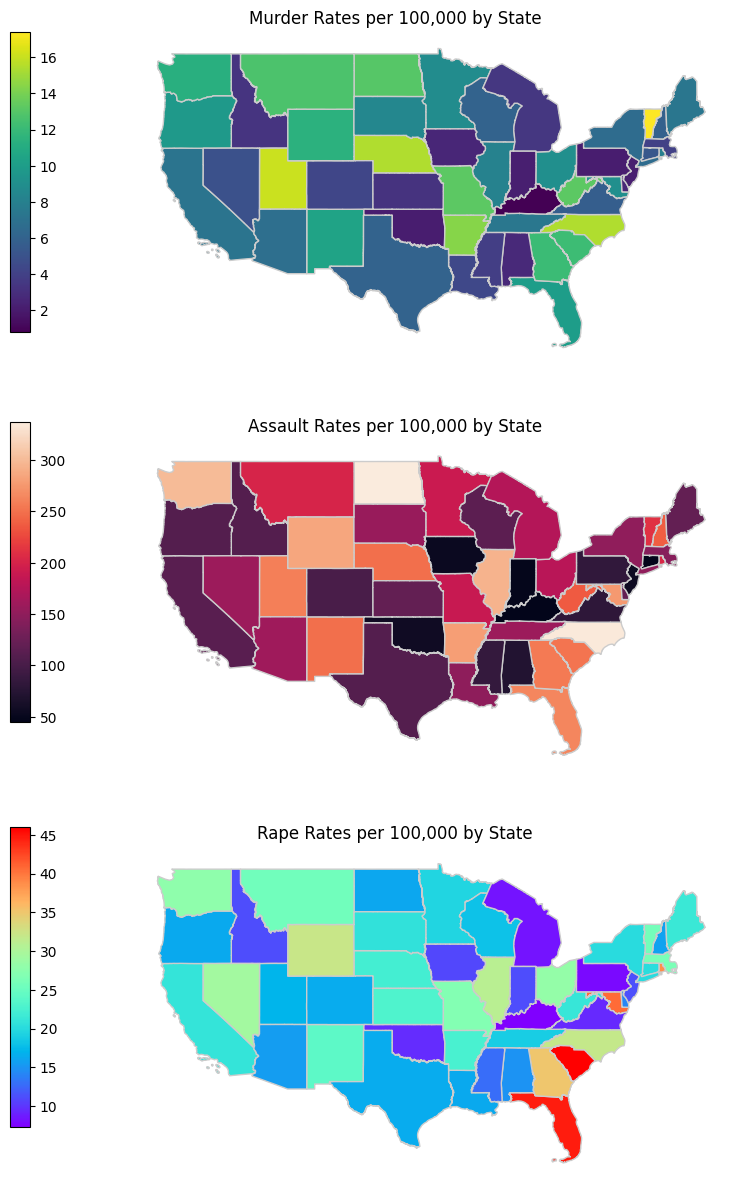

In [134]:
# Prepare data to create geographical heat map. 
shapefile = 'tl_2022_us_state.shp'
fig, (ax, ax1, ax2) = plt.subplots(3,1)
fig.set_size_inches(20,15)
states = geopd.read_file(shapefile)
states = states.to_crs("EPSG:3395")

# Identify states in one df only, in order to remove them for merge.
states1 = []
states2 = []
to_drop = []
for i in range(0,len(df['State'])):
    states1.append(df['State'][i])
for i in range(0,len(states['NAME'])):
    states2.append(states['NAME'][i])
for i in states2:
    if i not in states1:
        to_drop.append(i)
for i in to_drop:
    states.drop(states[states['NAME'] == i].index, inplace = True)

# Merge data frames.
merged_df = pd.merge(left=states, right=df, how='left', left_on='NAME', right_on='State', )

# Plot heat map of murder by state.
col = df['Murder']
vmin = col.min()
vmax = col.max()
cmap = 'viridis'
merged_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
ax.set_xlim(-1.5e7,-0.72e7)
ax.set_ylim(2.5e6, 6.5e6)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbaxes = fig.add_axes([0.32, 0.68, 0.01, 0.2])
cbar = fig.colorbar(sm, cax=cbaxes)
ax.axis('off')
ax.set_title("Murder Rates per 100,000 by State")

# Plot heat map of assault by state.
col = df['Assault']
vmin = col.min()
vmax = col.max()
cmap = 'rocket'
merged_df.plot(column=col, ax=ax1, edgecolor='0.8', linewidth=1, cmap=cmap)
ax1.set_xlim(-1.5e7,-0.72e7)
ax1.set_ylim(2.5e6, 6.5e6)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbaxes = fig.add_axes([0.32, 0.42, 0.01, 0.2])
cbar = fig.colorbar(sm, cax=cbaxes)
ax1.axis('off')
ax1.set_title("Assault Rates per 100,000 by State")

# Create heat map of rape by state.
col = df['Rape']
vmin = col.min()
vmax = col.max()
cmap = 'rainbow'
merged_df.plot(column=col, ax=ax2, edgecolor='0.8', linewidth=1, cmap=cmap)
ax2.set_xlim(-1.5e7,-0.72e7)
ax2.set_ylim(2.5e6, 6.5e6)
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbaxes = fig.add_axes([0.32, 0.15, 0.01, 0.2])
cbar = fig.colorbar(sm, cax=cbaxes)
ax2.axis('off')
ax2.set_title("Rape Rates per 100,000 by State")